In [443]:
import pandas as pd
from IPython.display import display
import mysql.connector

In [444]:
def create_connection():
    conn = None
    try:
       conn = mysql.connector.connect(
          user="DB00004175",
          password="tTNlXEirHh)EmwXhtp4koTR",
          host="menu-data-db.mdb0002067.db.skysql.net",
          ssl_ca="skysql_chain.pem",
          port=5001)
       conn.autocommit = False
       return conn
    except mysql.connector.Error as e:
       print(f"Error connecting to MariaDB Platform: {e}")
    return conn
conn = create_connection()

In [445]:
def sql_execute(conn, sql):

    try:
        cur = conn.cursor()
        cur.execute(sql, multi=True)
        conn.commit()
    except mysql.connector.Error as e:
        print(e)

In [446]:
def sql_execute_show(conn, sql):

    try:
        df = pd.read_sql(sql, con = conn)
        display(df)
    except mysql.connector.Error as e:
        print(e)

In [447]:
from matplotlib import pyplot as plt


# 1. What type of food has the highest average of calories?

In [448]:
sql_query1 = sql_execute_show(conn, sql = '''

SELECT fc.cat_name, nf.cat_id, AVG(calories) avg_cal
        FROM menu_cstore.nutrition_facts nf
        LEFT JOIN menu_cstore.food_category fc ON nf.cat_id = fc.cat_id
        GROUP BY fc.cat_name
        order by avg_cal desc
''')

,cat_name,cat_id,avg_cal
0,Burgers,3,737.9365
1,Entrees,5,674.4843
2,Sandwiches,9,640.4563
3,Desserts,4,535.3693
4,Salads,8,491.7148
5,Fried Potatoes,6,474.8087
6,Appetizers & Sides,0,452.5349
7,Pizza,7,375.2979
8,Baked Goods,1,320.5402
9,Soup,10,293.3740


In [450]:
sql_query1 = pd.read_sql(con = conn, sql = '''

SELECT fc.cat_name, nf.cat_id, AVG(calories) avg_cal
        FROM menu_cstore.nutrition_facts nf
        LEFT JOIN menu_cstore.food_category fc ON nf.cat_id = fc.cat_id
        GROUP BY fc.cat_name
        order by avg_cal desc
''')

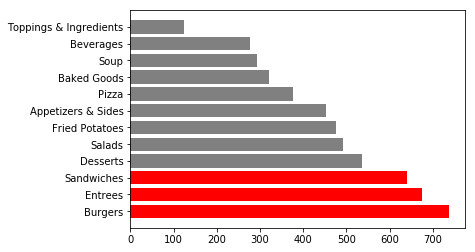

In [469]:
plt.barh(sql_query1['cat_name'], sql_query1['avg_cal'], color=['red','red', 'red', 'grey', 'grey',
                                                               'grey', 'grey', 'grey', 'grey', 'grey',
                                                               'grey', 'grey']);

# 2. What type of food has the highest average of cholestrol?

In [460]:
sql_execute_show(conn, sql = '''

SELECT fc.cat_name, avg(cholesterol) avg_chol
        FROM menu_cstore.nutrition_facts nf
        LEFT JOIN menu_cstore.food_category fc ON nf.cat_id = fc.cat_id
        GROUP BY fc.cat_name
        order by avg_chol desc
;
''')

,cat_name,avg_chol
0,Entrees,175.5359
1,Burgers,108.5269
2,Sandwiches,107.2060
3,Salads,86.5368
4,Appetizers & Sides,77.2685
5,Desserts,70.7206
6,Soup,45.8194
7,Pizza,42.5097
8,Beverages,18.5630
9,Toppings & Ingredients,17.7580


In [461]:
sql_query2 = pd.read_sql(con = conn, sql = '''

SELECT fc.cat_name, avg(cholesterol) avg_chol
        FROM menu_cstore.nutrition_facts nf
        LEFT JOIN menu_cstore.food_category fc ON nf.cat_id = fc.cat_id
        GROUP BY fc.cat_name
        order by avg_chol desc
;
''')

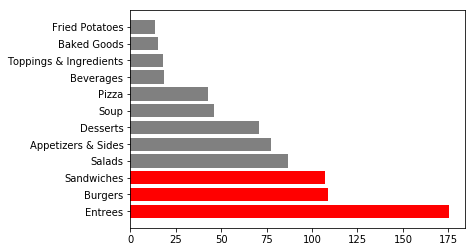

In [468]:
plt.barh(sql_query2['cat_name'], sql_query2['avg_chol'], color=['red','red', 'red', 'grey', 'grey',
                                                               'grey', 'grey', 'grey', 'grey', 'grey',
                                                               'grey', 'grey']);

# 3. What type of food has the highest average of total fat?

In [463]:
sql_execute_show(conn, sql = '''

SELECT fc.cat_name, avg(total_fat) avg_total_fat
        FROM menu_cstore.nutrition_facts nf
        LEFT JOIN menu_cstore.food_category fc ON nf.cat_id = fc.cat_id
        GROUP BY fc.cat_name
        order by avg_total_fat desc
;
''')

,cat_name,avg_total_fat
0,Burgers,43.4009
1,Sandwiches,37.8436
2,Entrees,35.7465
3,Salads,31.2229
4,Fried Potatoes,27.9534
5,Appetizers & Sides,26.5328
6,Desserts,25.8587
7,Pizza,18.9681
8,Soup,15.7107
9,Baked Goods,13.1416


In [464]:
sql_query3 = pd.read_sql(con = conn, sql = '''

SELECT fc.cat_name, avg(total_fat) avg_total_fat
        FROM menu_cstore.nutrition_facts nf
        LEFT JOIN menu_cstore.food_category fc ON nf.cat_id = fc.cat_id
        GROUP BY fc.cat_name
        order by avg_total_fat desc
;
''')

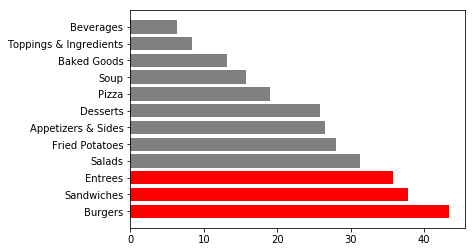

In [467]:
plt.barh(sql_query3['cat_name'], sql_query3['avg_total_fat'], color=['red','red', 'red', 'grey', 'grey',
                                                               'grey', 'grey', 'grey', 'grey', 'grey',
                                                               'grey', 'grey']);

# 4. Average daily sodium intake according to fda is 2300 mg. Which category has the highest average sodium?

In [405]:
sql_execute_show(conn, sql = '''

SELECT fc.cat_name, nf.cat_id, avg(sodium) avg_sodium
        FROM menu_cstore.nutrition_facts nf
        LEFT JOIN menu_cstore.food_category fc ON nf.cat_id = fc.cat_id
        GROUP BY fc.cat_name
        order by avg_sodium desc
;
''')

,cat_name,cat_id,avg_sodium
0,Sandwiches,9,1741.3864
1,Entrees,5,1522.4357
2,Burgers,3,1360.6340
3,Soup,10,1284.7896
4,Appetizers & Sides,0,1135.5703
5,Salads,8,1066.0680
6,Pizza,7,894.3457
7,Fried Potatoes,6,846.6797
8,Baked Goods,1,431.0031
9,Desserts,4,300.7714


In [470]:
sql_query4 = pd.read_sql(con = conn, sql = '''

SELECT fc.cat_name, nf.cat_id, avg(sodium) avg_sodium
        FROM menu_cstore.nutrition_facts nf
        LEFT JOIN menu_cstore.food_category fc ON nf.cat_id = fc.cat_id
        GROUP BY fc.cat_name
        order by avg_sodium desc
;
''')

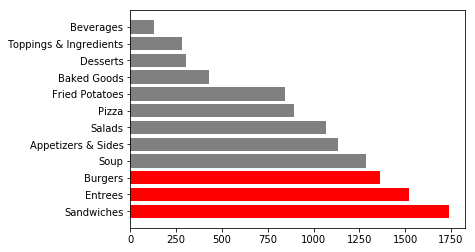

In [471]:
plt.barh(sql_query4['cat_name'], sql_query4['avg_sodium'], color=['red','red', 'red', 'grey', 'grey',
                                                               'grey', 'grey', 'grey', 'grey', 'grey',
                                                               'grey', 'grey']);

# 1. Top 10 restaurants that have high-calorie burgers?

In [410]:
sql_execute_show(conn, sql = ''' select nf.r_id, r.r_name, ii.item_name, avg(calories) avg_cal
from menu_cstore.item_info ii join menu_cstore.nutrition_facts nf join menu_cstore.restaurant r
on nf.item_id = ii.item_id and r.r_id = nf.r_id
where cat_id = 3 and nf.year = 2018
group by r_id
order by avg_cal desc limit 10
;
''')

,r_id,r_name,item_name,avg_cal
0,39,Hooters,Hooters Burger,1288.8462
1,8,Bonefish Grill,1/2 Pound Wagyu Beef Burger,1240.0000
2,78,Ruby Tuesday,Bacon Cheeseburger,1181.4507
3,4,BJ's Restaurant & Brewhouse,4 Sliders,1122.4000
4,47,Joe's Crab Shack,Bacon Cheeseburger,1032.5000
5,35,Friendly's,Patty Melt,998.2553
6,91,Whataburger,Justaburger,993.1338
7,6,Bob Evans,"Cheeseburger w/ French Fries, Kids",978.4615
8,26,Denny's,Double Cheeseburger,976.6667
9,87,The Capital Grille,Lobster & Crab Burger,965.0000


In [476]:
sql_query6 = pd.read_sql(con = conn, sql = '''

select nf.r_id, r.r_name, ii.item_name, avg(calories) avg_cal
from menu_cstore.item_info ii join menu_cstore.nutrition_facts nf join menu_cstore.restaurant r
on nf.item_id = ii.item_id and r.r_id = nf.r_id
where cat_id = 3 and nf.year = 2018
group by r_id
order by avg_cal desc limit 10
;
''')

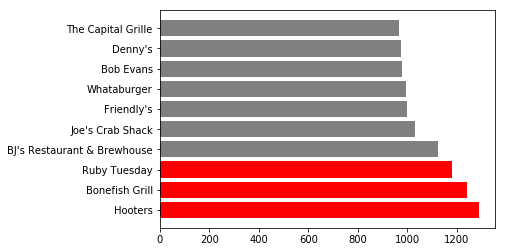

In [478]:
plt.barh(sql_query6['r_name'], sql_query6['avg_cal'], color=['red','red', 'red', 'grey', 'grey',
                                                               'grey', 'grey', 'grey', 'grey', 'grey',
                                                               'grey', 'grey']);

# 2. Top 10 restaurants that have high cholestrol entrees?

In [483]:
sql_execute_show(conn, sql = ''' select r.r_id, r.r_name, avg(cholesterol) avg_chol
from menu_cstore.nutrition_facts nf join menu_cstore.restaurant r
on r.r_id = nf.r_id
where cat_id = 5 and nf.year = 2018
group by r_id
order by avg_chol desc limit 10
;
''')

,r_id,r_name,avg_chol
0,59,O'Charley's,301.6667
1,32,Famous Dave's,297.6889
2,50,Krystal,294.0000
3,79,Sbarro,285.0980
4,47,Joe's Crab Shack,282.0290
5,68,Perkins,270.9048
6,95,Zaxby's,254.2453
7,6,Bob Evans,250.4965
8,27,Dickey's Barbeque Pit,235.1892
9,87,The Capital Grille,232.2727


In [486]:
sql_query7 = pd.read_sql(con = conn, sql = '''

select r.r_id, r.r_name, avg(cholesterol) avg_chol
from menu_cstore.nutrition_facts nf join menu_cstore.restaurant r
on r.r_id = nf.r_id
where cat_id = 5 and nf.year = 2018
group by r_id
order by avg_chol desc limit 10
;
''')

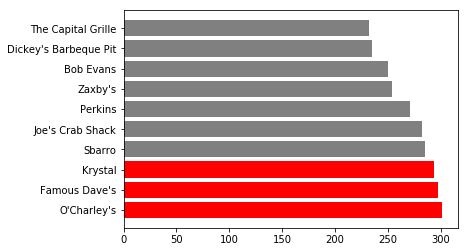

In [487]:
plt.barh(sql_query7['r_name'], sql_query7['avg_chol'], color=['red','red', 'red', 'grey', 'grey',
                                                               'grey', 'grey', 'grey', 'grey', 'grey',
                                                               'grey', 'grey']);

# 3. Top 10 restaurants that have high total fat burgers?

In [490]:
sql_execute_show(conn, sql = '''

select r.r_id, r.r_name, avg(total_fat) avg_total_fat
from menu_cstore.nutrition_facts nf join menu_cstore.restaurant r
on r.r_id = nf.r_id
where cat_id = 3 and nf.year = 2018
group by r_id
order by avg_total_fat desc limit 10
;
''')

,r_id,r_name,avg_total_fat
0,8,Bonefish Grill,93.5000
1,47,Joe's Crab Shack,67.3333
2,87,The Capital Grille,66.5000
3,39,Hooters,65.7778
4,78,Ruby Tuesday,62.9231
5,4,BJ's Restaurant & Brewhouse,61.7143
6,26,Denny's,60.8333
7,6,Bob Evans,59.8182
8,35,Friendly's,59.4878
9,40,IHOP,59.1429


In [491]:
sql_query8 = pd.read_sql(con = conn, sql = '''

select r.r_id, r.r_name, avg(total_fat) avg_total_fat
from menu_cstore.nutrition_facts nf join menu_cstore.restaurant r
on r.r_id = nf.r_id
where cat_id = 3 and nf.year = 2018
group by r_id
order by avg_total_fat desc limit 10
;
''')

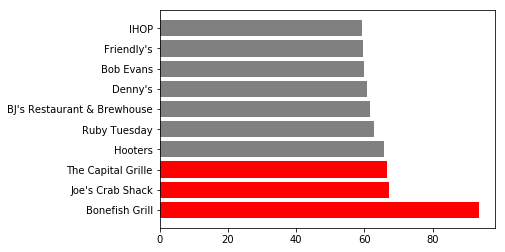

In [492]:
plt.barh(sql_query8['r_name'], sql_query8['avg_total_fat'], color=['red','red', 'red', 'grey', 'grey',
                                                               'grey', 'grey', 'grey', 'grey', 'grey',
                                                               'grey', 'grey']);

# 4. Top 10 restaurants that have high sodium sandwitches?

In [475]:
sql_execute_show(conn, sql = ''' select nf.r_id, r.r_name, avg(sodium) avg_sodium
from menu_cstore.item_info ii join menu_cstore.nutrition_facts nf join menu_cstore.restaurant r
on nf.item_id = ii.item_id and r.r_id = nf.r_id
where cat_id = 9 and nf.year = 2018
group by r_id
order by avg_sodium desc limit 10
;
''')

,r_id,r_name,avg_sodium
0,78,Ruby Tuesday,3200.0000
1,40,IHOP,2702.5532
2,39,Hooters,2701.7647
3,63,PF Chang's,2420.0000
4,45,Jersey Mike's Subs,2402.0141
5,47,Joe's Crab Shack,2341.2500
6,68,Perkins,2246.9048
7,4,BJ's Restaurant & Brewhouse,2244.6346
8,33,Firehouse Subs,2220.6926
9,66,Papa John's,2185.4545


In [494]:
sql_query9 = pd.read_sql(con = conn, sql = '''

select nf.r_id, r.r_name, avg(sodium) avg_sodium
from menu_cstore.item_info ii join menu_cstore.nutrition_facts nf join menu_cstore.restaurant r
on nf.item_id = ii.item_id and r.r_id = nf.r_id
where cat_id = 9 and nf.year = 2018
group by r_id
order by avg_sodium desc limit 10
;
''')

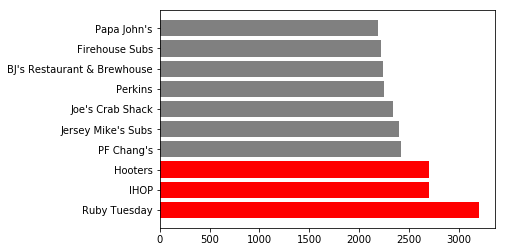

In [495]:
plt.barh(sql_query9['r_name'], sql_query9['avg_sodium'], color=['red','red', 'red', 'grey', 'grey',
                                                               'grey', 'grey', 'grey', 'grey', 'grey',
                                                               'grey', 'grey']);